In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('reviews.csv', index_col=0)
dataset.head()

,titles,ratings,reviews,dates,replies,reply_dates
0,Mais ou est ma commande???,1,"Commande N° 609249735,toujours non livrée,pass...",2023-02-07T17:39:04.000Z,"Bonjour, nous vous informons que nous avons pr...",2023-02-08T09:48:06.000Z
1,Cela fait plusieurs semaines même plus…,1,Magasin de Carrefour Trans en Provence 83\nCel...,2023-02-06T14:48:53.000Z,NaN,NaN
2,Commande Deliveroo annulé !,1,Commande Deliveroo passé ce jour sans suite ca...,2023-02-08T10:54:56.000Z,"Bonjour, nous vous remercions pour cette infor...",2023-02-08T12:59:53.000Z
3,une honte cette société qu'utilise…,1,une honte cette société qu'utilise Carrefour p...,2023-02-04T18:29:49.000Z,"Bonjour, pourriez-vous nous communiquer votre ...",2023-02-05T08:17:54.000Z
4,Tout se passe bien chez Carrefour City…,1,Tout se passe bien chez Carrefour City sauf po...,2023-02-05T11:41:45.000Z,"Bonjour, pouvez-vous nous préciser quel magasi...",2023-02-04T16:18:10.000Z


## Slice the dataset to only 50 rows for fast demo

In [4]:
np.random.seed(42)
random_idx_50 = np.random.randint(low =0,
                  high = len(dataset),
                  size = 50)

dataset_50 = dataset.iloc[random_idx_50, :]
dataset_50.head()

,titles,ratings,reviews,dates,replies,reply_dates
1126,Attention ! Réelle arnaque !,1,Attention ! Arnaque ! \n\nCommande de 129 euro...,2021-01-22T14:44:55.000Z,"Bonjour Clément,",2020-09-23T15:55:48.268Z
1459,aucun respect avec les clients prenne…,1,aucun respect avec les clients prenne pas en ...,2020-01-10T20:00:32.000Z,NaN,NaN
860,Rupture stock pressé agrume et mug de l…,1,Rupture stock pressé agrume et mug de l opérat...,2021-04-10T15:11:47.000Z,NaN,NaN
1294,Carrefour L'Isle-Adam 95290 :,3,Carrefour L'Isle-Adam 95290 :\nVous proposiez ...,2020-05-28T07:25:28.000Z,NaN,NaN
1130,Une honte et dangereux!,1,Commande effectuée via le site hier matin (16/...,2020-09-18T09:36:44.000Z,"Bonjour Armelle,",2020-09-21T11:00:38.627Z


### Cleaning the `\n` token to make reviews better

In [5]:
dataset_50['reviews'].iloc[0]

"Attention ! Arnaque ! \n\nCommande de 129 euros passé sur votre site:\n- le produits ne correspondent pas du tout à la commande. J'ai reçu des produits surgelés que je n'ai jamais commandé, des pommes de terres surgelées en forme de sourire.... ???? comprend rien à cette commande.\n- le livreur arrive en avance et me dit que ça ne l'arrange pas d'attendre l'heure à laquelle j'ai demandé ma livraison, et que ça ne l'arrange pas non plus de la ramener au dépôt... Et moi dans cette histoire qu'est ce qui m'arrange ?? Il s'en fiche en fait.\nQuand on demande une livraison entre 19h et 21h c'est justement parce qu'on est pas dispo à 18h40. Il vous raccroche au nez sans aucun scrupule, quand il rappelle il ne s'excuse même pas, il vous re-raccroche au nez.. INCROYABLE !!! J'ai du le harceler au téléphone pour qu'il décide d'arriver à 19h20 après qu'on est couru en pensant qu'il allait se barrer...\n\nService tout simplement scandaleux. Je ne pensais pas qu'un groupe comme Carrefour puisse à

In [6]:
dataset_50['reviews'].iloc[0].replace("\n", "")

"Attention ! Arnaque ! Commande de 129 euros passé sur votre site:- le produits ne correspondent pas du tout à la commande. J'ai reçu des produits surgelés que je n'ai jamais commandé, des pommes de terres surgelées en forme de sourire.... ???? comprend rien à cette commande.- le livreur arrive en avance et me dit que ça ne l'arrange pas d'attendre l'heure à laquelle j'ai demandé ma livraison, et que ça ne l'arrange pas non plus de la ramener au dépôt... Et moi dans cette histoire qu'est ce qui m'arrange ?? Il s'en fiche en fait.Quand on demande une livraison entre 19h et 21h c'est justement parce qu'on est pas dispo à 18h40. Il vous raccroche au nez sans aucun scrupule, quand il rappelle il ne s'excuse même pas, il vous re-raccroche au nez.. INCROYABLE !!! J'ai du le harceler au téléphone pour qu'il décide d'arriver à 19h20 après qu'on est couru en pensant qu'il allait se barrer...Service tout simplement scandaleux. Je ne pensais pas qu'un groupe comme Carrefour puisse à ce point manq

In [7]:
# put into the function

def remove_new_line(df, col_name):
    df['clean_review'] = df[col_name].apply(lambda x : x.replace("\n", ""))

    return df

In [8]:
remove_new_line(dataset_50, col_name="reviews").head()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_98020/2313864234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df[col_name].apply(lambda x : x.replace("\n", ""))


,titles,ratings,reviews,dates,replies,reply_dates,clean_review
1126,Attention ! Réelle arnaque !,1,Attention ! Arnaque ! \n\nCommande de 129 euro...,2021-01-22T14:44:55.000Z,"Bonjour Clément,",2020-09-23T15:55:48.268Z,Attention ! Arnaque ! Commande de 129 euros pa...
1459,aucun respect avec les clients prenne…,1,aucun respect avec les clients prenne pas en ...,2020-01-10T20:00:32.000Z,NaN,NaN,aucun respect avec les clients prenne pas en ...
860,Rupture stock pressé agrume et mug de l…,1,Rupture stock pressé agrume et mug de l opérat...,2021-04-10T15:11:47.000Z,NaN,NaN,Rupture stock pressé agrume et mug de l opérat...
1294,Carrefour L'Isle-Adam 95290 :,3,Carrefour L'Isle-Adam 95290 :\nVous proposiez ...,2020-05-28T07:25:28.000Z,NaN,NaN,Carrefour L'Isle-Adam 95290 :Vous proposiez un...
1130,Une honte et dangereux!,1,Commande effectuée via le site hier matin (16/...,2020-09-18T09:36:44.000Z,"Bonjour Armelle,",2020-09-21T11:00:38.627Z,Commande effectuée via le site hier matin (16/...


### Concat `titles` and `clean_review` into `combined_review`
The purpose of this data engineering is to make sure the model could leand the context from both of these sources of information

In [9]:
dataset_50['titles'] + " " + dataset_50['clean_review']

1126    Attention ! Réelle arnaque ! Attention ! Arnaq...
1459    aucun  respect avec les clients prenne… aucun ...
860     Rupture stock pressé agrume et mug de l… Ruptu...
1294    Carrefour L'Isle-Adam 95290 : Carrefour L'Isle...
1130    Une honte et dangereux! Commande effectuée via...
1095    tromperie jeu carrefour Apres une commande en ...
1724    Mauvais étiquetages récurrents ou… Mauvais éti...
1044    Très déçu promotion qui commence mardi… Très d...
1638    Personnel désagréable Personnel désagréable Su...
121     Commande passée le 26.11.22 et livrable… Comma...
466     Remise fidélité jamais cagnottee J’ai acheté u...
1238    Super Service client efficace bien que diffici...
330     Mécontentement Bonjour,C’est très bien d’avoir...
1482    SHOPPING ONLINE PAS AU POINT... DU TOUT ..... ...
87      Bonjour Bonjour Je viens d'acheter des boulots...
1396    Que la conjoncture actuelle soit… Que la conjo...
1123    Foire aux vins : Toujours pas livrée au bout d...
871     Loin d

### Functionaize all the tasks to clean the dataframe

In [10]:
def remove_new_line(df, review_col):
    df['clean_review'] = df[review_col].apply(lambda x : x.replace("\n", ""))

    return df

def create_combined_df(df, title_col, review_col):
    df['combined_reviews'] = df[title_col] + " " + df[review_col]
    return df

def remove_and_combined(df, title_col, review_col):
    df = remove_new_line(df, review_col) #first remove the `\n` tokens on the reviews column
    df = create_combined_df(df, title_col, "clean_review") #then concat `title` and `clean_review` together
    return df


In [11]:
new_df  = remove_and_combined(df = dataset_50,
                    title_col= "titles",
                    review_col="reviews")
new_df.head()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_98020/3917190288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df[review_col].apply(lambda x : x.replace("\n", ""))
/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_98020/3917190288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_reviews'] = df[title_col] + " " + df[review_col]


,titles,ratings,reviews,dates,replies,reply_dates,clean_review,combined_reviews
1126,Attention ! Réelle arnaque !,1,Attention ! Arnaque ! \n\nCommande de 129 euro...,2021-01-22T14:44:55.000Z,"Bonjour Clément,",2020-09-23T15:55:48.268Z,Attention ! Arnaque ! Commande de 129 euros pa...,Attention ! Réelle arnaque ! Attention ! Arnaq...
1459,aucun respect avec les clients prenne…,1,aucun respect avec les clients prenne pas en ...,2020-01-10T20:00:32.000Z,NaN,NaN,aucun respect avec les clients prenne pas en ...,aucun respect avec les clients prenne… aucun ...
860,Rupture stock pressé agrume et mug de l…,1,Rupture stock pressé agrume et mug de l opérat...,2021-04-10T15:11:47.000Z,NaN,NaN,Rupture stock pressé agrume et mug de l opérat...,Rupture stock pressé agrume et mug de l… Ruptu...
1294,Carrefour L'Isle-Adam 95290 :,3,Carrefour L'Isle-Adam 95290 :\nVous proposiez ...,2020-05-28T07:25:28.000Z,NaN,NaN,Carrefour L'Isle-Adam 95290 :Vous proposiez un...,Carrefour L'Isle-Adam 95290 : Carrefour L'Isle...
1130,Une honte et dangereux!,1,Commande effectuée via le site hier matin (16/...,2020-09-18T09:36:44.000Z,"Bonjour Armelle,",2020-09-21T11:00:38.627Z,Commande effectuée via le site hier matin (16/...,Une honte et dangereux! Commande effectuée via...


---

In [12]:
new_df['combined_reviews'].to_csv('test_50.csv')

In [13]:
new_df['combined_reviews'].iloc[19]

"Le produit est défectueux Le produit est défectueux. J'ai appelé de nombreuses fois le SAV. Rien n'y fait. SAV inexistant"

In [14]:
sth = new_df.iloc[:20].copy(deep=True)

In [15]:
sth['product_quality'] = 0
sth['customer_service'] = 0
sth['delivery'] = 0
sth['user_exp'] = 0
sth['product_avail'] = 0

In [16]:
sth.iloc[3, 8: ] = [0, 1, 0, 1, 0 ]
sth.iloc[4, 8: ] = [1, 0, 1, 0, 0 ]
sth.iloc[5, 8: ] = [0, 1, 0, 0, 0 ]
sth.iloc[6, 8: ] = [1, 1, 0, 1, 1 ]
sth.iloc[7, 8: ] = [0, 0, 0, 0, 1 ]
sth.iloc[8, 8: ] = [0, 1, 0, 0, 0 ]
sth.iloc[9, 8: ] = [0, 1, 1, 0, 0 ]
sth.iloc[10, 8: ] = [0, 1, 0, 1, 0 ]
sth.iloc[11, 8: ] = [0, 1, 0, 1, 0 ]
sth.iloc[12, 8: ] = [0, 0, 1, 1, 0 ]
sth.iloc[13, 8: ] = [0, 0, 0, 1, 1 ]
sth.iloc[14, 8: ] = [1, 0, 0, 0, 0 ]
sth.iloc[15, 8: ] = [0, 1, 0, 1, 0 ]
sth.iloc[16, 8: ] = [0, 1, 1, 1, 0 ]
sth.iloc[17, 8: ] = [1, 0, 0, 0, 0 ]
sth.iloc[18, 8: ] = [0, 1, 0, 1, 0 ]
sth.iloc[19, 8: ] = [1, 1, 0, 0, 0 ]

In [17]:
sth

,titles,ratings,reviews,dates,replies,reply_dates,clean_review,combined_reviews,product_quality,customer_service,delivery,user_exp,product_avail
1126,Attention ! Réelle arnaque !,1,Attention ! Arnaque ! \n\nCommande de 129 euro...,2021-01-22T14:44:55.000Z,"Bonjour Clément,",2020-09-23T15:55:48.268Z,Attention ! Arnaque ! Commande de 129 euros pa...,Attention ! Réelle arnaque ! Attention ! Arnaq...,0,0,0,0,0
1459,aucun respect avec les clients prenne…,1,aucun respect avec les clients prenne pas en ...,2020-01-10T20:00:32.000Z,NaN,NaN,aucun respect avec les clients prenne pas en ...,aucun respect avec les clients prenne… aucun ...,0,0,0,0,0
860,Rupture stock pressé agrume et mug de l…,1,Rupture stock pressé agrume et mug de l opérat...,2021-04-10T15:11:47.000Z,NaN,NaN,Rupture stock pressé agrume et mug de l opérat...,Rupture stock pressé agrume et mug de l… Ruptu...,0,0,0,0,0
1294,Carrefour L'Isle-Adam 95290 :,3,Carrefour L'Isle-Adam 95290 :\nVous proposiez ...,2020-05-28T07:25:28.000Z,NaN,NaN,Carrefour L'Isle-Adam 95290 :Vous proposiez un...,Carrefour L'Isle-Adam 95290 : Carrefour L'Isle...,0,1,0,1,0
1130,Une honte et dangereux!,1,Commande effectuée via le site hier matin (16/...,2020-09-18T09:36:44.000Z,"Bonjour Armelle,",2020-09-21T11:00:38.627Z,Commande effectuée via le site hier matin (16/...,Une honte et dangereux! Commande effectuée via...,1,0,1,0,0
1095,tromperie jeu carrefour,1,Apres une commande en drive la semaine du 21/0...,2020-10-22T18:11:16.000Z,"Bonjour,",2020-10-23T13:43:43.823Z,Apres une commande en drive la semaine du 21/0...,tromperie jeu carrefour Apres une commande en ...,0,1,0,0,0
1724,Mauvais étiquetages récurrents ou…,2,Mauvais étiquetages récurrents ou absents dans...,2018-06-05T06:48:32.000Z,NaN,NaN,Mauvais étiquetages récurrents ou absents dans...,Mauvais étiquetages récurrents ou… Mauvais éti...,1,1,0,1,1
1044,Très déçu promotion qui commence mardi…,2,Très déçu promotion qui commence mardi 24 nove...,2020-11-26T10:23:20.000Z,NaN,NaN,Très déçu promotion qui commence mardi 24 nove...,Très déçu promotion qui commence mardi… Très d...,0,0,0,0,1
1638,Personnel désagréable,1,Personnel désagréable \nSuspecte ses clients d...,2019-03-27T10:05:35.000Z,NaN,NaN,Personnel désagréable Suspecte ses clients de ...,Personnel désagréable Personnel désagréable Su...,0,1,0,0,0
121,Commande passée le 26.11.22 et livrable…,1,Commande passée le 26.11.22 et livrable le 29....,2022-12-02T02:30:45.000Z,"Bonjour, pouvez-vous nous préciser votre numér...",2022-12-02T12:16:37.000Z,Commande passée le 26.11.22 et livrable le 29....,Commande passée le 26.11.22 et livrable… Comma...,0,1,1,0,0


for furtther reference on using `pytorch`
https://towardsdatascience.com/multi-label-emotion-classification-with-pytorch-huggingfaces-transformers-and-w-b-for-tracking-a060d817923

In [18]:
# opening the file in read mode
my_file = open("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/french_stopword.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
french_stopwords_list = data.replace('\n', ' ').split(" ")
  
# # printing the data
print(french_stopwords_list)
my_file.close()

['a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayez', 'ayons', 'b', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'brrr', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ce

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
sth.iloc[: 15, 8:]

,product_quality,customer_service,delivery,user_exp,product_avail
1126,0,0,0,0,0
1459,0,0,0,0,0
860,0,0,0,0,0
1294,0,1,0,1,0
1130,1,0,1,0,0
1095,0,1,0,0,0
1724,1,1,0,1,1
1044,0,0,0,0,1
1638,0,1,0,0,0
121,0,1,1,0,0


<AxesSubplot: >

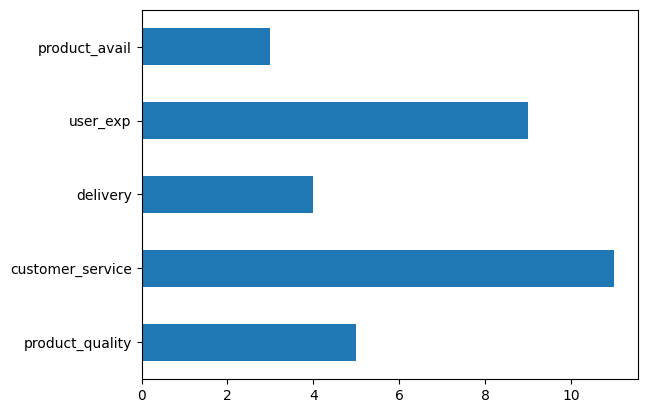

In [109]:
sth.iloc[: , 8:].sum().plot(kind = 'barh')

In [74]:

from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, hamming_loss, classification_report, f1_score

In [77]:
vectorizer = TfidfVectorizer(stop_words=french_stopwords_list)

In [78]:
X = vectorizer.fit_transform(sth['combined_reviews'])
X_train = X[:16, :]
X_test = X[15:, :]
y_train = sth.iloc[: 16, 8:]
y_test = sth.iloc[15:, 8:]

In [98]:
classifier = BinaryRelevance(
    classifier = SVC(kernel='rbf'),
    require_dense = [False, True])

In [99]:
# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print(predictions.toarray())
print("Accuracy = ",accuracy_score(y_test, predictions))

[[0 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
Accuracy =  0.2


In [81]:
print(multilabel_confusion_matrix(y_true = y_test,
                 y_pred = predictions, labels = ))

SyntaxError: invalid syntax (1897181734.py, line 2)

In [82]:
print(classification_report(y_true = y_test,
                 y_pred = predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0

   micro avg       1.00      0.50      0.67        10
   macro avg       0.40      0.27      0.30        10
weighted avg       0.70      0.50      0.55        10
 samples avg       0.80      0.47      0.57        10



/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this be

In [83]:
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [100]:
classifier = ClassifierChain(
    classifier = SVC(kernel='rbf'),
    require_dense = [False, True])


# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print(predictions.toarray())

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

[[0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
Accuracy =  0.4
F1 score is  0.6666666666666665
Hamming Loss is  0.24


In [101]:
print(classification_report(y_true = y_test,
                 y_pred = predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         0

   micro avg       0.75      0.60      0.67        10
   macro avg       0.29      0.33      0.31        10
weighted avg       0.52      0.60      0.56        10
 samples avg       0.80      0.57      0.63        10



/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
classifier = LabelPowerset(
    classifier = SVC(kernel='sigmoid'),
    require_dense = [False, True])


# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print(predictions.toarray())

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

[[0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]]
Accuracy =  0.4
F1 score is  0.7
Hamming Loss is  0.24


In [103]:
print(classification_report(y_true = y_test,
                 y_pred = predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1
           3       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70        10
   macro avg       0.28      0.40      0.33        10
weighted avg       0.50      0.70      0.58        10
 samples avg       0.70      0.63      0.66        10



/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/carlosito/Documents/Virtual_Environment/hexamind/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
